In [ ]:
#!pip install RegscorePy

In [186]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE

from RegscorePy import bic,aic

import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [187]:
df = pd.read_excel("/content/Data_Cortex_Nuclear.xls")
df.head(10)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [188]:
new_df = df.iloc[:,1:df.shape[1]-4]
new_df.shape

(1080, 77)

In [189]:
pd.set_option('display.max_rows',None)
new_df.isna().sum()

DYRK1A_N             3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAF_N              3
pCAMKII_N            3
pCREB_N              3
pELK_N               3
pERK_N               3
pJNK_N               3
PKCA_N               3
pMEK_N               3
pNR1_N               3
pNR2A_N              3
pNR2B_N              3
pPKCAB_N             3
pRSK_N               3
AKT_N                3
BRAF_N               3
CAMKII_N             3
CREB_N               3
ELK_N               18
ERK_N                3
GSK3B_N              3
JNK_N                3
MEK_N                7
TRKA_N               3
RSK_N                3
APP_N                3
Bcatenin_N          18
SOD1_N               3
MTOR_N               3
P38_N                3
pMTOR_N              3
DSCR1_N              3
AMPKA_N              3
NR2B_N               3
pNUMB_N              3
RAPTOR_N             3
TIAM1_N              3
pP70S6_N             3
NUMB_N     

In [190]:
imputer = KNNImputer(n_neighbors=3, weights='uniform')
full_df = imputer.fit_transform(new_df)

In [191]:
full_df = StandardScaler().fit_transform(full_df)

In [192]:
pca = PCA(n_components=2)
pca.fit(full_df)
pca_df = pca.transform(full_df)

Total explained variance:  [0.25425279 0.17482096]


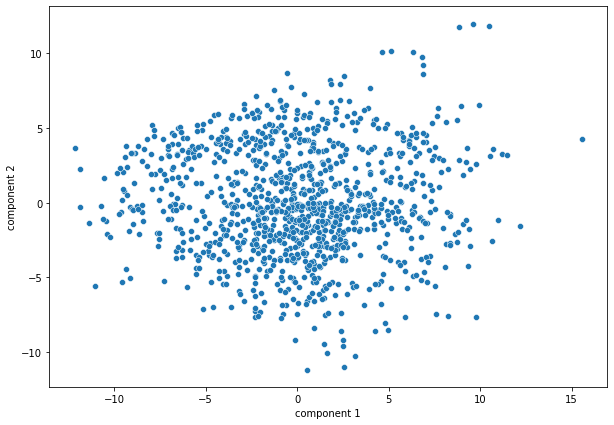

In [194]:
print("Total explained variance: ", pca.explained_variance_ratio_)
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_df[:, 0], y=pca_df[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

In [196]:
pca = PCA(n_components=3)
pca.fit(full_df)
pca_df = pca.transform(full_df)

Total explained variance:  [0.25425279 0.17482096 0.10371174]


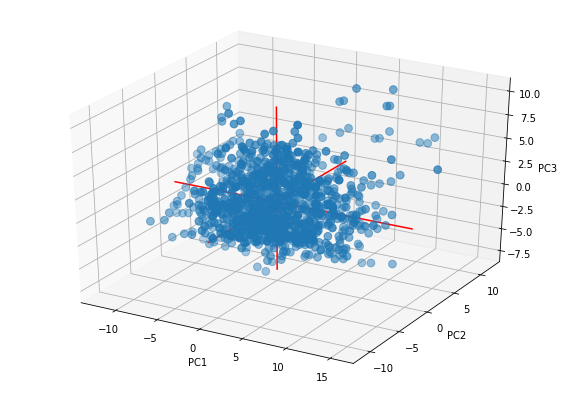

In [197]:
print("Total explained variance: ", pca.explained_variance_ratio_)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df[:,0], pca_df[:,1], pca_df[:,2], s=60)
 

xAxisLine = ((min(pca_df[:,0]), max(pca_df[:,0])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(pca_df[:,1]), max(pca_df[:,1])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(pca_df[:,2]), max(pca_df[:,2])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

In [198]:
tsne_df = TSNE(n_components=2).fit_transform(full_df)

[[ 31.99243352 -10.3583212 ]
 [ 13.79845256  38.36588535]
 [-21.92961647 -23.31239447]
 [ -7.61912946  27.4402566 ]
 [  8.86586007 -25.97642213]
 [-33.92122809   0.88866622]
 [-10.95969133 -39.1140572 ]
 [ 10.08087436   2.66792993]]


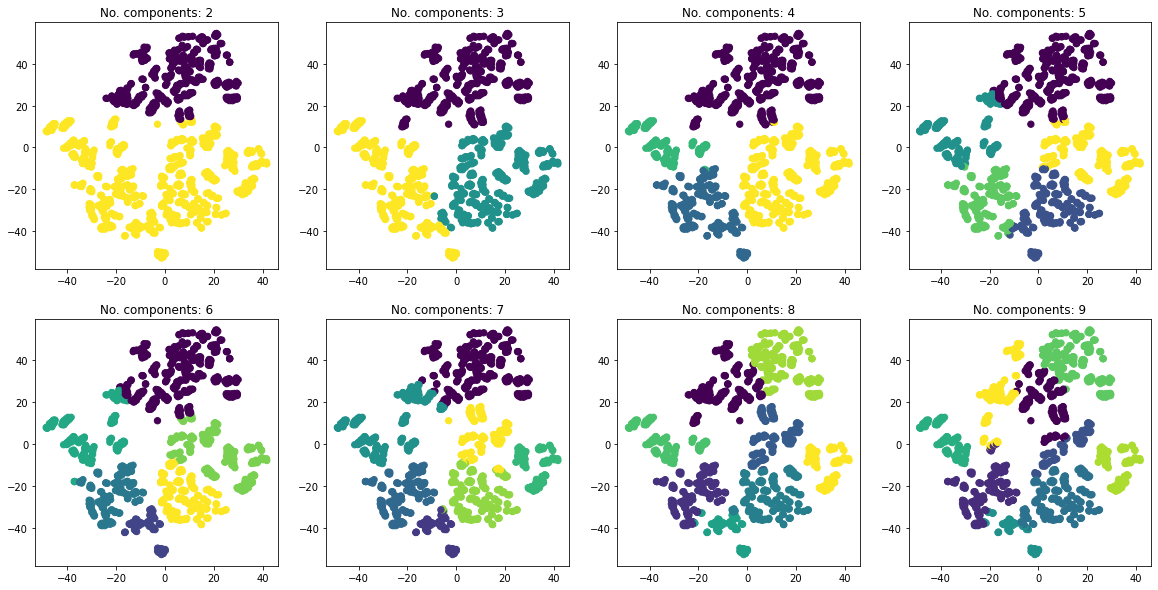

In [199]:
fig, axs = plt.subplots(2,4,figsize=(20,10))
k,j=0,0
for clusters in range(2,10):
  model = GaussianMixture(n_components=clusters, random_state=0)
  model.fit(tsne_df)
  labels = model.predict(tsne_df)

  axs[k,j].scatter(tsne_df[:, 0], tsne_df[:, 1], c=labels, s=40, cmap='viridis');
  axs[k,j].set_title("No. components: {}".format(clusters))
  if j == 3:
    j=0
    k+=1
  else:
    j+=1

  
model = GaussianMixture(n_components=8)
model.fit(tsne_df)
print(model.means_)

[[  7.1535115  37.880135 ]
 [  8.742879  -28.71122  ]
 [ -8.663385   -4.408625 ]
 [-16.663048  -34.942364 ]
 [ 33.58834    -3.9918652]
 [-31.258467   12.803987 ]
 [ 22.977995   23.474365 ]
 [ -9.459566   25.772715 ]]


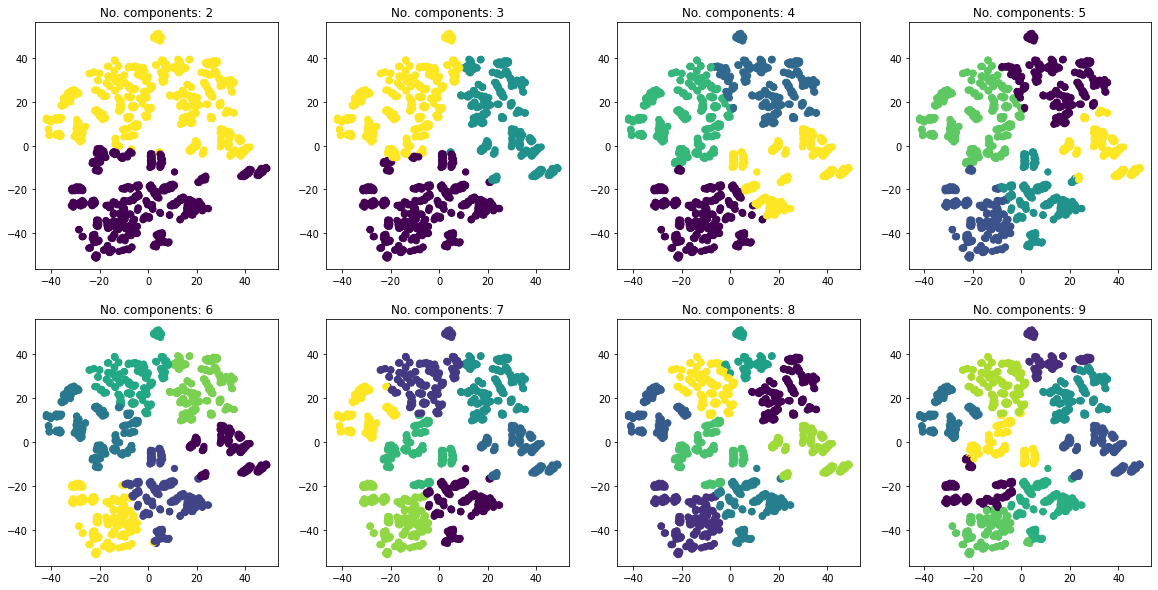

In [185]:
fig, axs = plt.subplots(2,4,figsize=(20,10))
k,j=0,0
for clusters in range(2,10):
  model = KMeans(n_clusters=clusters,  random_state=0)
  model.fit(tsne_df)
  labels = model.predict(tsne_df)

  axs[k,j].scatter(tsne_df[:, 0], tsne_df[:, 1], c=labels, s=40, cmap='viridis');
  axs[k,j].set_title("No. components: {}".format(clusters))

  if j == 3:
    j=0
    k+=1
  else:
    j+=1

model = KMeans(n_clusters=8)
model.fit(tsne_df)
print(model.cluster_centers_)

[[ 33.58834    -3.9918652]
 [-31.258467   12.803987 ]
 [  8.742879  -28.71122  ]
 [  5.6831384  36.065197 ]
 [-10.468497   25.196058 ]
 [-16.663048  -34.942364 ]
 [ -8.663385   -4.408625 ]
 [ 23.252186   23.486134 ]]


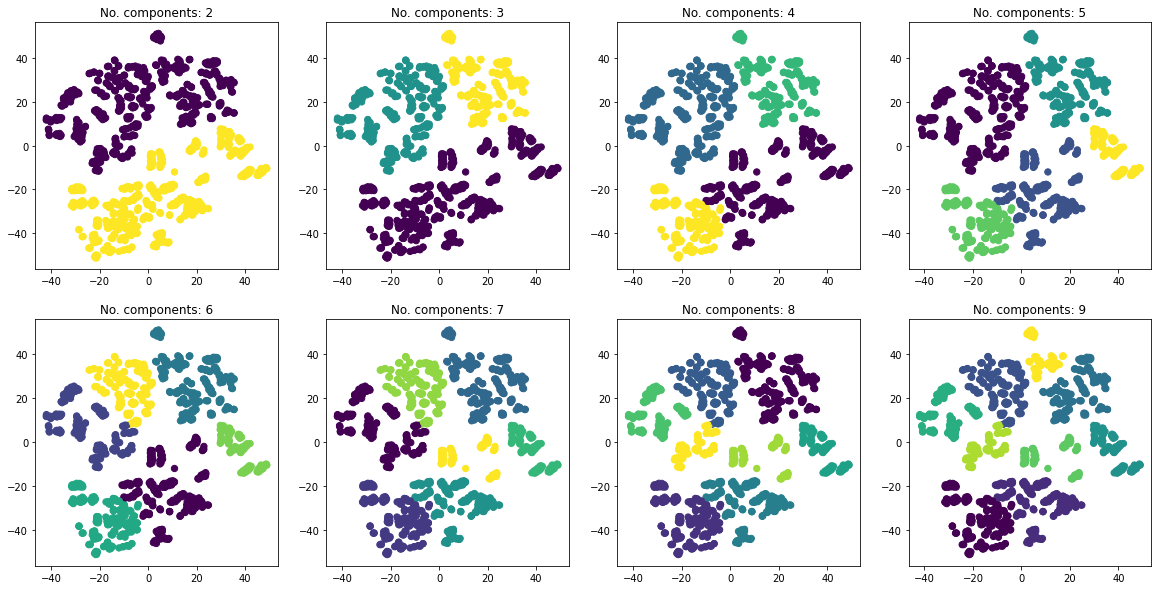

In [181]:
fig, axs = plt.subplots(2,4,figsize=(20,10))
k,j=0,0
for clusters in range(2,10):
  model = AgglomerativeClustering(n_clusters=clusters)
  labels = model.fit_predict(tsne_df)

  axs[k,j].scatter(tsne_df[:, 0], tsne_df[:, 1], c=labels, s=40, cmap='viridis');
  axs[k,j].set_title("No. components: {}".format(clusters))
  if j == 3:
    j=0
    k+=1
  else:
    j+=1

model = KMeans(n_clusters=8)
model.fit(tsne_df)
print(model.cluster_centers_)

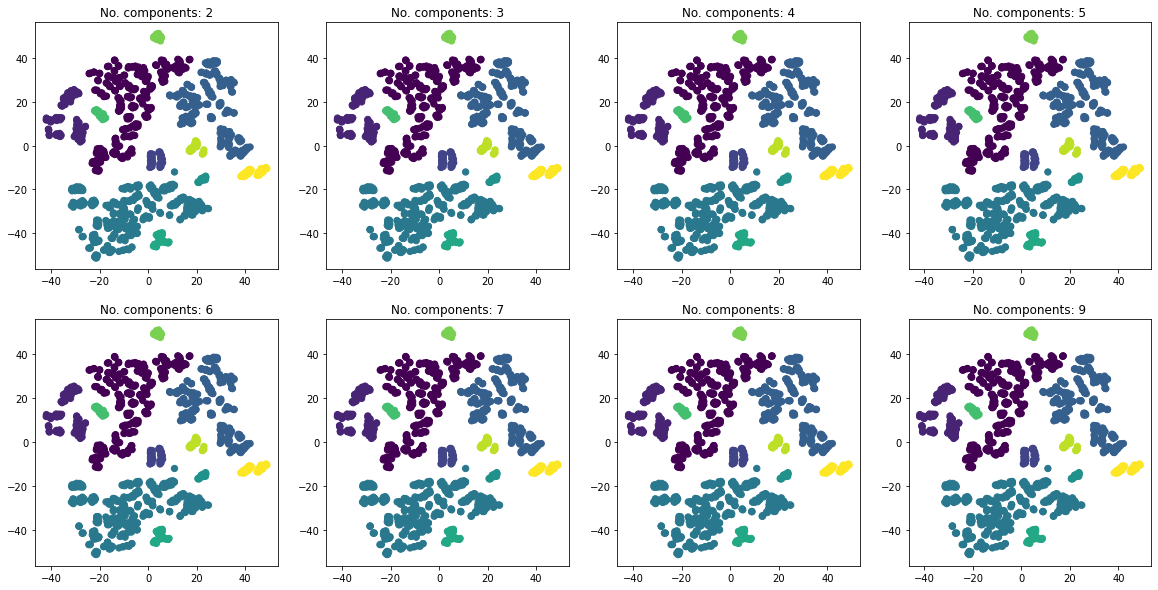

In [180]:
fig, axs = plt.subplots(2,4,figsize=(20,10))
k,j=0,0
for clusters in range(2,10):
  model = DBSCAN(eps=6, min_samples=7)
  labels = model.fit_predict(tsne_df)

  axs[k,j].scatter(tsne_df[:, 0], tsne_df[:, 1], c=labels, s=40, cmap='viridis');
  axs[k,j].set_title("No. components: {}".format(clusters))
  if j == 3:
    j=0
    k+=1
  else:
    j+=1